Our aim in this notebook is to solve the binary classification problem regarding the two customer segmentation. 

First we load out dataset, begin to inspect, look for missing values, impute, etc.

In [1]:
import pandas as pd

df = pd.read_csv("output.csv")

In [2]:
# View the first few rows of the DataFrame
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  2174        1954  Graduation         Single  46344.0        1         1   
1  4141        1965  Graduation       Together  71613.0        0         0   
2  6182        1984  Graduation       Together  26646.0        1         0   
3  5324        1981         PhD        Married  58293.0        1         0   
4  7446        1967      Master       Together  62513.0        0         1   

   Recency  MntWines  MntFruits  ...  MntGoldProds  NumDealsPurchases  \
0       38        11          1  ...             6                  2   
1       26       426         49  ...            42                  1   
2       26        11          4  ...             5                  2   
3       94       173         43  ...            15                  5   
4       16       520         42  ...            14                  2   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0          

In [3]:
# View the last few rows of the DataFrame
print(df.tail())

        ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1692  8372        1974  Graduation        Married  34421.0        1         0   
1693  4001        1946         PhD       Together  64014.0        2         1   
1694  7270        1981  Graduation       Divorced  56981.0        0         0   
1695  8235        1956      Master       Together  69245.0        0         1   
1696  9405        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  ...  MntGoldProds  NumDealsPurchases  \
1692       81         3          3  ...             9                  1   
1693       56       406          0  ...             8                  7   
1694       91       908         48  ...            24                  1   
1695        8       428         30  ...            61                  2   
1696       40        84          3  ...            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurc

In [4]:
# Get a concise summary of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1697 non-null   int64  
 1   Year_Birth           1697 non-null   int64  
 2   Education            1697 non-null   object 
 3   Marital_Status       1697 non-null   object 
 4   Income               1697 non-null   float64
 5   Kidhome              1697 non-null   int64  
 6   Teenhome             1697 non-null   int64  
 7   Recency              1697 non-null   int64  
 8   MntWines             1697 non-null   int64  
 9   MntFruits            1697 non-null   int64  
 10  MntMeatProducts      1697 non-null   int64  
 11  MntFishProducts      1697 non-null   int64  
 12  MntSweetProducts     1697 non-null   int64  
 13  MntGoldProds         1697 non-null   int64  
 14  NumDealsPurchases    1697 non-null   int64  
 15  NumWebPurchases      1697 non-null   i

In [5]:

# Generate descriptive statistics
print(df.describe())

                 ID   Year_Birth        Income      Kidhome     Teenhome  \
count   1697.000000  1697.000000   1697.000000  1697.000000  1697.000000   
mean    5591.355333  1969.185622  45632.246774     0.542722     0.552740   
std     3262.119168    11.455372  18078.500559     0.548987     0.544878   
min        1.000000  1940.000000   3502.000000     0.000000     0.000000   
25%     2802.000000  1960.000000  31761.000000     0.000000     0.000000   
50%     5510.000000  1971.000000  44375.000000     1.000000     1.000000   
75%     8418.000000  1977.000000  58692.000000     1.000000     1.000000   
max    11191.000000  1996.000000  95169.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  1697.000000  1697.000000  1697.000000      1697.000000   
mean     48.964643   226.369476    12.780200        90.054213   
std      28.944949   300.259309    18.867291       127.433360   
min       0.000000     0.000000     0.000000         0.

In [6]:
# Get the dimensions of the DataFrame
print(df.shape)

(1697, 23)


In [7]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Check for cells containing the digit 0
zeros_cells = (df == 0).sum()

# Print the result for missing values
print("Missing values:")
print(missing_values)

# Print the result for cells containing the digit 0
print("\nCells containing the digit 0:")
print(zeros_cells)


Missing values:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
year                   0
month                  0
day                    0
Segment                0
dtype: int64

Cells containing the digit 0:
ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                    0
Kidhome                 821
Teenhome                801
Recency                  22
MntWines                 13
MntFruits               360
MntMeatProducts           1
MntFishProducts         353
MntSweetProducts        377
M

In [8]:
# Impute numerical columns with mean
numerical_cols = df.select_dtypes(include='number').columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute non-numerical columns with mode
non_numerical_cols = df.select_dtypes(exclude='number').columns
for col in non_numerical_cols:
    mode_val = df[col].mode()[0]  # Get the mode value for the column
    df[col] = df[col].fillna(mode_val)

# Verify that there are no missing values left
print("Remaining missing values after imputation:")
print(df.isnull().sum())

Remaining missing values after imputation:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
year                   0
month                  0
day                    0
Segment                0
dtype: int64


In [9]:
# One-hot encode non-numerical columns
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'])

# Display the updated DataFrame
print(df.head())


     ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  2174        1954  46344.0        1         1       38        11          1   
1  4141        1965  71613.0        0         0       26       426         49   
2  6182        1984  26646.0        1         0       26        11          4   
3  5324        1981  58293.0        1         0       94       173         43   
4  7446        1967  62513.0        0         1       16       520         42   

   MntMeatProducts  MntFishProducts  ...  Education_Graduation  \
0                6                2  ...                  True   
1              127              111  ...                  True   
2               20               10  ...                  True   
3              118               46  ...                 False   
4               98                0  ...                 False   

   Education_Master  Education_PhD  Marital_Status_Alone  \
0             False          False                 False

In [10]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [11]:
X = df.drop('Segment', axis=1)
y = df['Segment']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9676470588235294


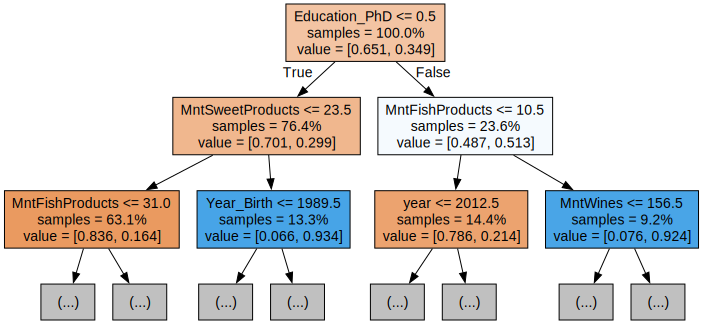

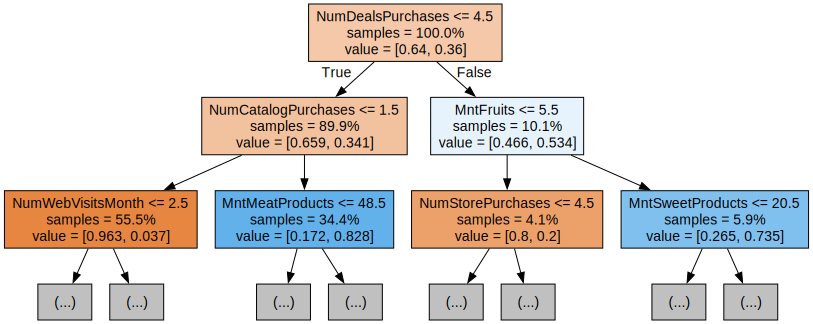

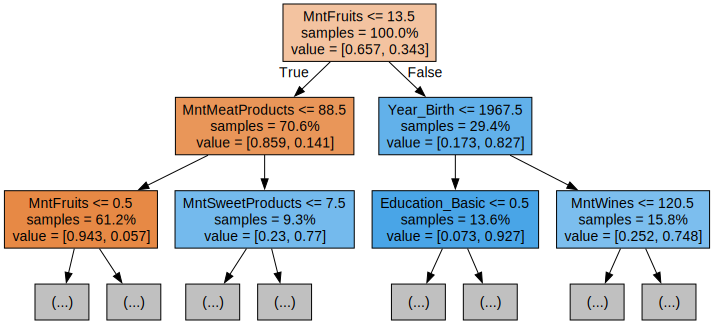

In [13]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [17]:
import joblib

# Save the model to a file
joblib.dump(rf, r"C:\Users\abdul\Desktop\Big Data Project\Model.joblib")

['C:\\Users\\abdul\\Desktop\\Big Data Project\\Model.joblib']